In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [210]:
df=pd.read_csv("/content/diminos_data.csv")

In [211]:
df.shape

(15000, 3)

In [212]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [213]:
df.rename(columns={'order_id':"order id","order_placed_at":'order placed',"order_delivered_at":'order delivered'},inplace=True)

In [214]:
df.columns

Index(['order id', 'order placed', 'order delivered'], dtype='object')

In [215]:
df.dtypes

order id            int64
order placed       object
order delivered    object
dtype: object

In [216]:
df.describe(include='all')

,order id,order placed,order delivered
count,1.500000e+04,15000,15000
unique,NaN,14953,15000
top,NaN,2023-03-27 10:46:29,2023-03-01 00:18:07.443132
freq,NaN,2,1
mean,1.530610e+06,NaN,NaN
std,4.330271e+03,NaN,NaN
min,1.523111e+06,NaN,NaN
25%,1.526861e+06,NaN,NaN
50%,1.530610e+06,NaN,NaN
75%,1.534360e+06,NaN,NaN


In [217]:
df.duplicated().sum()

0

In [218]:
df.isnull().sum()

order id           0
order placed       0
order delivered    0
dtype: int64

In [219]:
df.corr()

,order id
order id,1.0


<Axes: >

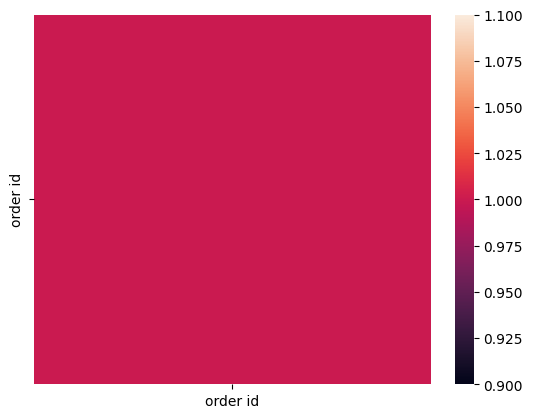

In [220]:
sns.heatmap(df.corr())

<Axes: >

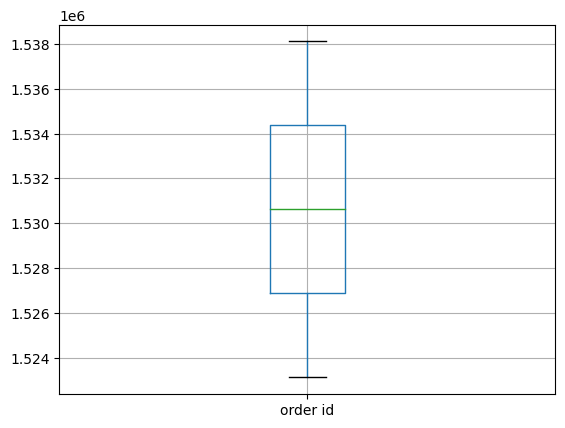

In [221]:
df.boxplot()

In [222]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
df['order placed']= lab.fit_transform(df['order placed'])
df['order delivered']= lab.fit_transform(df['order delivered'])

In [223]:
df.drop(['order id'],axis=1,inplace=True)

In [224]:
df

,order placed,order delivered
0,0,0
1,1,1
2,2,2
3,3,13
4,4,3
...,...,...
14995,14948,14994
14996,14949,14995
14997,14950,14996
14998,14951,14997


In [225]:
x=df.drop(['order delivered'],axis=1)
y=df["order delivered"]

In [226]:
x.head()

,order placed
0,0
1,1
2,2
3,3
4,4


In [227]:
y.head()

0     0
1     1
2     2
3    13
4     3
Name: order delivered, dtype: int64

In [228]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [229]:
x_train.head()

,order placed
10439,10405
9236,9203
818,816
11504,11466
11722,11684


In [230]:
y_train.head()

10439    10436
9236      9236
818        934
11504    11504
11722    11721
Name: order delivered, dtype: int64

# **Building and Training the Model**

In [231]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

## **Our model has now been trained.we can examine each of the model’s coefficients using the following statement:**

In [232]:
print(regressor.coef_)

[1.00318258]


## **Similarly, here is we can see the intercept of the regression equation:**

In [233]:
print(regressor.intercept_)

0.19160782053950243


## **A nicer way to view the coefficients is by placing them in a DataFrame. This can be done with the following statement:**

In [243]:
df=pd.DataFrame(regressor.coef_, x.columns, columns = ['Coeff'])
df.head()

,Coeff
order placed,1.003183


# **Making Predictions From Our Model**

In [235]:
#Here is the code we will need to generate predictions from our model using the predict method
predictions = regressor.predict(x_test)

**The predictions variable holds the predicted values of the features stored in x_test. Since we used the train_test_split method to store the real values in y_test, what we want to do next is compare the values of the predictions array with the values of y_test.An easy way to do this is plot the two arrays using a scatterplot. It’s easy to build matplotlib scatterplots using the plt.scatter method. Here’s the code for this:**

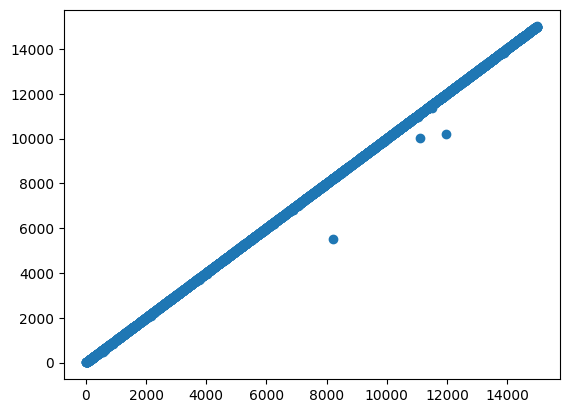

In [236]:
plt.scatter(y_test, predictions)

# **Testing the Performance of our Model**

In [237]:
from sklearn import metrics

# ***Testing the Performance of our Model We learned near the beginning of this course that there are three main performance metrics used for regression machine learning models: ***
**1.Mean absolute error**

**2.Mean squared error**

**3.Root mean squared error**

# **1.Mean Absolute Error (MAE)**

In [238]:
mae=metrics.mean_absolute_error(y_test, predictions)
print("The Mean absolute error (MAE) of Our Model is :",mae)

The Mean absolute error (MAE) of Our Model is : 3.9864806012952676


# **2.Mean squared error**

In [239]:
mse=metrics.mean_squared_error(y_test, predictions)
print("The Mean Squared error (MSE) of Our Model is :",mse)

The Mean Squared error (MSE) of Our Model is : 2638.467790821162


# **3.Root mean squared error**

In [240]:
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))
print("The Root Mean Squared Error (RMSE) of Our Model is :",rmse)

The Root Mean Squared Error (RMSE) of Our Model is : 51.36601786026596


# **R2 Score**
***The R2 score (pronounced R-Squared Score) is a statistical measure that tells us how well our model is making all its predictions on a scale of zero to one. As we know it's not ideal for a model to predict the actual values in a regression problem (as opposed to a classification problem that has discrete levels of value).But we can use the R2 score to determine the accuracy of our model in terms of distance or residual. ***

In [241]:
from sklearn.metrics import r2_score
score=r2_score(y_test, predictions)
score

0.9998565936724086

# **When to Use the R2 Score As Accuracy**

**You can use the R2 score to get the accuracy of your model on a percentage scale, that is 0–100, just like in a classification model.The r2_score requires two parameters – the actual value and the predicted values in which we have passed to it above. The result from the metrics is this:**

In [242]:
print("The Accuracy of Our Model is :",score*100,"%")

The Accuracy of Our Model is : 99.98565936724087 %


# **The Accuracy of Our Model is : 99.98565936724087 %**